In [178]:
import pandas as pd
import matplotlib as plt

In [147]:
ames = pd.read_csv("train.csv")

In [256]:
df = ames[['GarageType', "GarageCars","GarageCond","PavedDrive", "WoodDeckSF", "OpenPorchSF","EnclosedPorch","ScreenPorch", "YrSold", "SaleType", "SaleCondition", "SalePrice"]]

In [257]:
# GarageType - Garage or no Garage
# GarageCars
# GarageCond - further investigate
# PavedDrive - dummify them
# OpenPorchSF +
# EnclosedPorch + 
# ScreenPorch +
# YrSold
# SaleCodition Investigate Subgroups
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [258]:
#GarageType - Garage or no Garage 
df.loc[:,('GarageType')] = list(map(str, df['GarageType']))
replacements = {"nan": 'N',
                'Attchd': 'Y',
                'Detchd': 'Y',
                 'BuiltIn': 'Y',
                'CarPort': 'Y',
                'Basment': 'Y',
                '2Types': 'Y'}
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
df.loc[:,('GarageType')]= [replace_all(l, replacements) for l in df['GarageType']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002772C324588>,
      dtype=object)

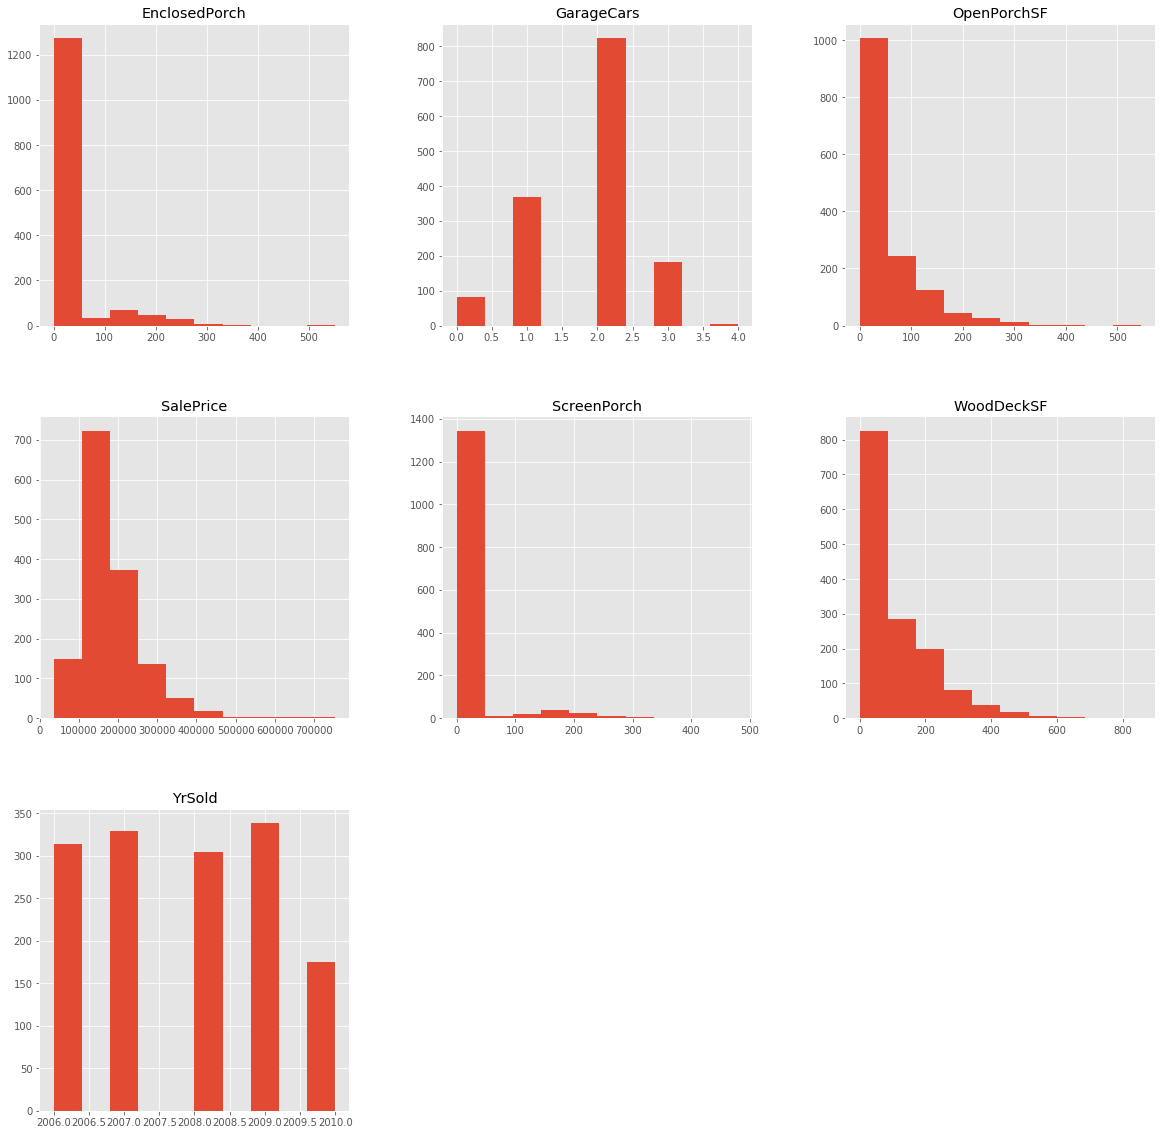

In [259]:
df.hist(figsize = (20, 20))

In [260]:
df.describe()

,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.767123,94.244521,46.660274,21.954110,15.060959,2007.815753,180921.195890
std,0.747315,125.338794,66.256028,61.119149,55.757415,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,2.000000,0.000000,25.000000,0.000000,0.000000,2008.000000,163000.000000
75%,2.000000,168.000000,68.000000,0.000000,0.000000,2009.000000,214000.000000
max,4.000000,857.000000,547.000000,552.000000,480.000000,2010.000000,755000.000000


In [184]:
#Garagecars
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [273]:
# GarageCond - Changed NA to 'No Garage'
df.loc[:,("GarageCond")] = df["GarageCond"].fillna("No Garage")

array(['TA', 'Fa', 'No Garage', 'Gd', 'Po', 'Ex'], dtype=object)

(array([1326.,    0.,   35.,    0.,   81.,    0.,    9.,    0.,    7.,
           2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

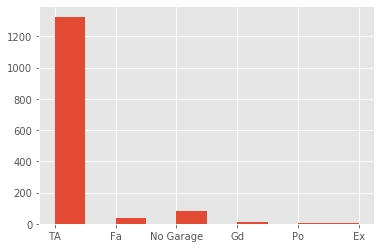

In [274]:
from matplotlib import pyplot as plt
plt.hist(df['GarageCond'])

<BarContainer object of 1460 artists>

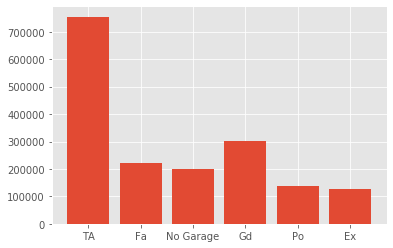

In [282]:
plt.bar(df['GarageCond'], df['SalePrice'])

In [ ]:
#Dummify PavedDrive

(array([1340.,    0.,    0.,    0.,    0.,   90.,    0.,    0.,    0.,
          30.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

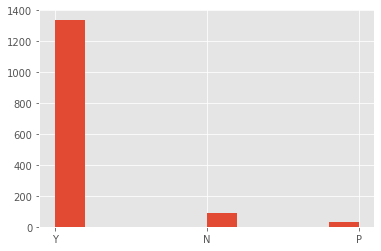

In [278]:
plt.hist(df['PavedDrive'])

Text(0, 0.5, 'SalePrice')

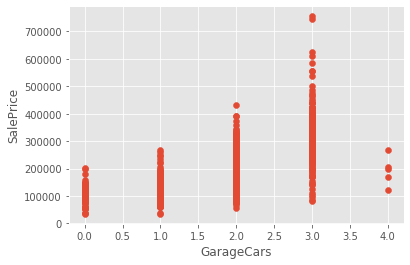

In [250]:
plt.scatter(df['GarageCars'], df['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')

In [287]:
# OpenPorchSF +
# EnclosedPorch + 
# ScreenPorch +

total_sum= df["EnclosedPorch"]+ df["EnclosedPorch"] + df["ScreenPorch"]
df['Total.Porch'] = total_sum



C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
